**Law of Large Numbers states:**

The Law of Large Numbers (LLN) states that as the sample size 𝑁 increases, the sample mean of a random variable will tend to converge to the expected value (mean) of that variable. In the context of Gaussian (normal) random numbers generated with a mean of 0 and standard deviation of 1, this means that as 𝑁 becomes very large, approximately 68.2% of the values will fall within the range of -1 to 1.

Large Number is: 1 000, 100 000, 100 000 000 etc

Let us test the law using Python:



In [23]:
# let us import libraries we need:
from random import seed, gauss 
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Let us set up seed reproducibility of random numbers. It means each time we run the test, we get the same range of random numbers in return.
seed(42) 

Let us move to the first function, where we generate a random list of numbers.
We have the case of normal (gaussian) distribution, which assumes the following parameters: mean = 0 and standard deviation = 1 and looks like a "bell".

Mean 0:  The average of the generated numbers is centered around 0.
Standard Deviation (1): The spread or dispersion of the numbers around the mean is determined by the standard deviation, which is 1 in this case.

In order to generate the list we can use randn() function or gauss(). In fact randn() is better when it comes to large numbers. It works wise with memory. However for the demo purpose I would like to use gauss(). 

In [25]:
# As an input we use N, N is any large number
def gen_random_numbers(N):
    return [gauss(0, 1) for _ in range(N)]

#the result of generation is a list of numbers.

# To compare you can use randn()
# Generate Gaussian random numbers using NumPy
#def gen_random_numbers(N):
#    return np.random.randn(N)
# Note: you may have to fix slightly counter calculation
#counter = np.sum((-1 < random_numbers) & (random_numbers < 1))

Now let us move to the second function. Here we are going to calculate the proportion itself.

Let us explain in more details:
* We have a number 1000;
* We generate a list of numbers with standard deviation 1;
* 68.2% of generated numbers fall into  this range

**AND**
As we increase 𝑁 (the number of generated random values):
* The proportion of values that fall within −1,1 will become closer to 68.27%;
* The fluctuations around 68.27% will become smaller


In [26]:
# The input of the function is the output of previous function, the list of generated values
def law_of_large_numbers(random_numbers):
    # here we count the number of values which fall into -1,1 range
    # in other words how many values are concentrated around 0 and are in range -1,1
    counter = sum(-1 < num < 1 for num in random_numbers)
    # here we count proportion in percentage
    proportion = (counter / len(random_numbers)) * 100  # Convert to percentage
    return proportion

Let us set up data for experiment:

In [32]:
# Test the Law of Large Numbers for different N
N_values = [1000, 1500, 10000, 10500, 100000, 150000, 500000, 700000, 750000]
#let us declare list where we are going to store the proportion for each given N
proportions = []

In [33]:
# We iterate over the list of our large numbers
for N in N_values:
    #we run the first function with the first, seconds, etc... N from the list
    random_numbers = gen_random_numbers(N)
    #we calculate proportion of numbers within -1,1 range
    proportion = law_of_large_numbers(random_numbers)
    # add value to the list of proportions
    proportions.append(proportion)
    # and print the whole list, so we can assess results of our experiment
    # when printing round to 1 sign after comma
    print(f"N = {N}, Proportion within -1 and 1: {proportion:.1f}%")

N = 1000, Proportion within -1 and 1: 65.9%
N = 1500, Proportion within -1 and 1: 69.5%
N = 10000, Proportion within -1 and 1: 68.2%
N = 10500, Proportion within -1 and 1: 68.2%
N = 100000, Proportion within -1 and 1: 68.0%
N = 150000, Proportion within -1 and 1: 68.2%
N = 500000, Proportion within -1 and 1: 68.3%
N = 700000, Proportion within -1 and 1: 68.3%
N = 750000, Proportion within -1 and 1: 68.3%


Let us visualize the results:

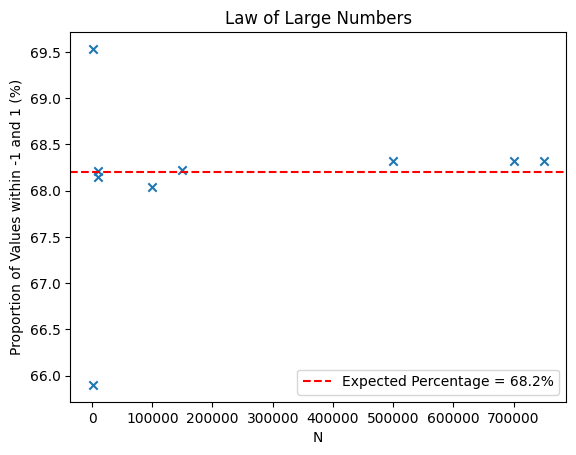

In [34]:
# Let us built a scatter plot: N from N_values <-> Proportion from proportions
plt.scatter(N_values, proportions, marker='x')
# Let us add red line with y = 68.2 and x = 0, red color
plt.axhline(y=68.2, color='r', linestyle='--', label='Expected Percentage = 68.2%')
# Give names to labels
plt.xlabel('N')
plt.ylabel('Proportion of Values within -1 and 1 (%)')
# Give title
plt.title('Law of Large Numbers')
# allow to display a legend in the right lower corner
plt.legend(loc='lower right')
# print the plot
plt.show()

# Make conclusions / experiments with other large numbers
